Bài tập 1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)  # Đặt seed ngẫu nhiên để đảm bảo kết quả tái hiện được

def load_data_from_file(fileName="/content/advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)  # Đọc dữ liệu từ file CSV
    features_X = data[:, :3]  # Lấy 3 cột đầu tiên (TV, Radio, Newspaper)
    sales_Y = data[:, 3]  # Lấy cột cuối cùng là doanh thu

    intercept = np.ones((features_X.shape[0], 1))  # Tạo cột gồm toàn giá trị 1
    features_X = np.concatenate((intercept, features_X), axis=1)  # Ghép cột 1 vào trước dữ liệu features_X
    return features_X, sales_Y  # Trả về features_X và sales_Y

Question 2

In [10]:
features_X , _ = load_data_from_file ()
print ( features_X [:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


Question 3

In [11]:
_ , sales_Y = load_data_from_file ()
print ( sales_Y . shape )

(200,)


Bài tập 2

In [12]:
import random

def create_individual(n=4, bound=10):
    # Khởi tạo cá thể bằng cách tạo ra n giá trị ngẫu nhiên trong khoảng [-bound/2, bound/2]
    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]
    return individual

# Gọi hàm để tạo một cá thể
individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


Bài tập 3

In [13]:
import numpy as np

# Hàm tính toán loss của một cá thể
def compute_loss(individual):
    theta = np.array(individual)  # Chuyển individual thành mảng numpy
    y_hat = features_X.dot(theta)  # Tính y_hat bằng phép nhân ma trận
    loss = np.mean(np.square(y_hat - sales_Y))  # Tính bình phương sai số trung bình (mean squared error)
    return loss

# Hàm tính toán fitness của một cá thể
def compute_fitness(individual):
    loss = compute_loss(individual)  # Tính giá trị loss của cá thể
    fitness_value = 1 / (loss + 1)  # Tính fitness theo công thức
    return fitness_value

Question 4

In [15]:
# Gọi hàm load_data_from_file() để có features_X và sales_Y
features_X, sales_Y = load_data_from_file("/content/advertising.csv")

# Kiểm tra hàm compute_fitness với một cá thể
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


Bài tập 4

In [19]:
import random

def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    # Duyệt qua từng gene của cả hai cá thể
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            # Hoán đổi gene tại vị trí i
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

Question 5

In [20]:
# Ví dụ kiểm tra
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

# Thực hiện crossover
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


Bài tập 5

In [21]:
import random

def mutate(individual, mutation_rate=0.05, bound=10):
    # Tạo bản sao của cá thể ban đầu để không làm thay đổi cá thể gốc
    individual_m = individual.copy()

    # Duyệt qua từng gene trong cá thể
    for i in range(len(individual_m)):
        # Xác suất để gene tại vị trí i bị đột biến
        if random.random() < mutation_rate:
            # Thay đổi giá trị của gene này bằng một giá trị ngẫu nhiên trong khoảng [-bound/2, bound/2]
            individual_m[i] = random.uniform(-bound/2, bound/2)

    return individual_m

Question 6

In [22]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


Bài tập 6

In [23]:
def initializePopulation(m, n=4, bound=10):
    # Khởi tạo population gồm m cá thể, mỗi cá thể có n gene
    population = [create_individual(n, bound) for _ in range(m)]
    return population

Bài tập 7

In [25]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

Bài tập 8

In [26]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)  # Số lượng cá thể trong quần thể cũ
    # Sắp xếp quần thể cũ theo fitness để chọn elitism
    sorted_population = sorted(old_population, key=compute_fitness)

    # In ra cá thể tốt nhất (elitism) của thế hệ hiện tại
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])

    new_population = []

    # Tạo ra quần thể mới cho đến khi số lượng đạt yêu cầu (m - elitism)
    while len(new_population) < m - elitism:
        # 1. Selection: Chọn 2 cá thể từ quần thể cũ
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # 2. Crossover: Lai tạo giữa 2 cá thể được chọn
        child1, child2 = crossover(parent1, parent2)

        # 3. Mutation: Thực hiện đột biến trên các cá thể con
        child1 = mutate(child1)
        child2 = mutate(child2)

        # Thêm cá thể con vào quần thể mới
        new_population.append(child1)
        if len(new_population) < m - elitism:  # Đảm bảo số lượng không vượt quá m - elitism
            new_population.append(child2)

    # 4. Elitism: Copy các cá thể tốt nhất từ quần thể cũ vào quần thể mới
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])

Question 7

In [27]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


Bài tập 9

In [32]:
def run_GA():
    n_generations = 100  # Số thế hệ
    m = 600  # Số lượng cá thể trong quần thể
    features_X, sales_Y = load_data_from_file()  # Đọc dữ liệu

    population = initializePopulation(m)  # Khởi tạo quần thể ban đầu
    losses_list = []  # Danh sách lưu giá trị loss

    for i in range(n_generations):
        population, losses = create_new_population(population, 2, i)  # Tạo quần thể mới
        losses_list.append(losses)  # Lưu lại giá trị loss của thế hệ hiện tại

    return losses_list

Bài tập 10

Best loss: 668.5248029279751 with chromosome: [3.776945711141682, 0.15301878127901514, 1.2599571337718283, -0.9539343757053098]
Best loss: 472.13645503916007 with chromosome: [-2.6137657947432134, 0.20515443982644488, -0.7240471142358977, -0.2073303226148857]
Best loss: 472.13645503916007 with chromosome: [-2.6137657947432134, 0.20515443982644488, -0.7240471142358977, -0.2073303226148857]
Best loss: 269.53210012772234 with chromosome: [4.074368405889327, -0.03832953825459651, 1.0135992359800339, -0.021216990549151937]
Best loss: 269.53210012772234 with chromosome: [4.074368405889327, -0.03832953825459651, 1.0135992359800339, -0.021216990549151937]
Best loss: 269.53210012772234 with chromosome: [4.074368405889327, -0.03832953825459651, 1.0135992359800339, -0.021216990549151937]
Best loss: 269.53210012772234 with chromosome: [4.074368405889327, -0.03832953825459651, 1.0135992359800339, -0.021216990549151937]
Best loss: 251.10444190539872 with chromosome: [2.3631231987133603, -0.038329538

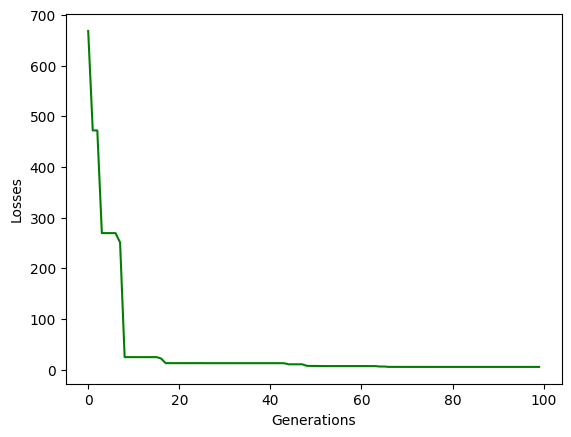

In [38]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    # Vẽ biểu đồ với dữ liệu trong losses_list
    plt.plot(losses_list, c='green')  # Vẽ đường biểu diễn với màu xanh lá cây
    plt.xlabel('Generations')  # Đặt nhãn trục x là 'Generations' (Số thế hệ)
    plt.ylabel('Losses')  # Đặt nhãn trục y là 'Losses' (Giá trị loss)
    plt.show()  # Hiển thị biểu đồ

losses_list = run_GA()  # Gọi hàm run_GA để lấy danh sách losses
visualize_loss(losses_list)  # Gọi hàm visualize_loss để vẽ biểu đồ

Bài tập 11

Best individual: [-4.389575607803725, -0.3286877245173825, 0.9648492262453754, 1.9932312509592727]


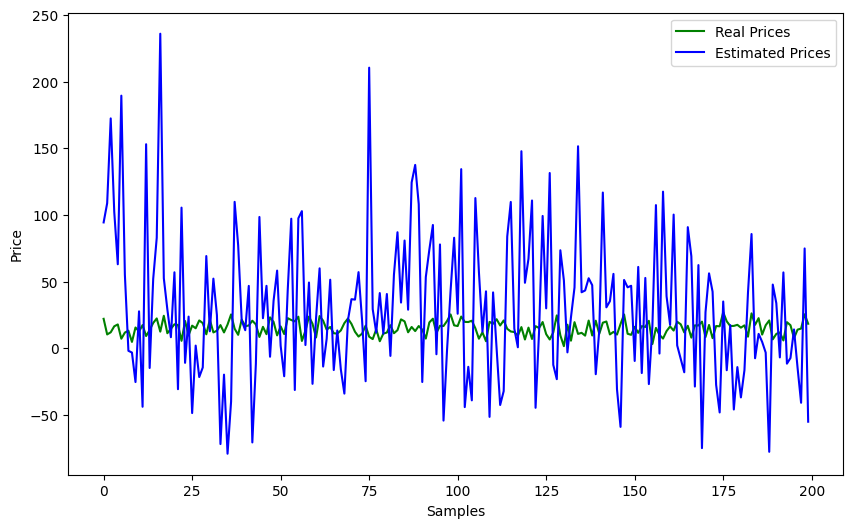

In [42]:
def visualize_predict_gt():
    # Sắp xếp quần thể dựa trên fitness và lấy cá thể tốt nhất
    sorted_population = sorted(population, key=compute_fitness)
    print("Best individual:", sorted_population[-1])
    theta = np.array(sorted_population[-1])  # Chuyển cá thể tốt nhất thành mảng numpy

    # Tính toán giá trị dự đoán sales dựa trên các tham số θ từ cá thể tốt nhất
    estimated_prices = []
    for feature in features_X:
        estimated_price = sum(c * x for x, c in zip(feature, theta))  # Tính y_hat = X * θ
        estimated_prices.append(estimated_price)

    # Trực quan hóa giá trị thực tế và giá trị dự đoán
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')  # Vẽ giá trị thực tế (màu xanh lá cây)
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')  # Vẽ giá trị dự đoán (màu xanh dương)
    plt.legend()
    plt.show()

# Giả sử bạn đã có population, features_X, và sales_Y từ các bài tập trước
visualize_predict_gt()

[-4.389575607803725, -0.3286877245173825, 0.9648492262453754, 1.9932312509592727]


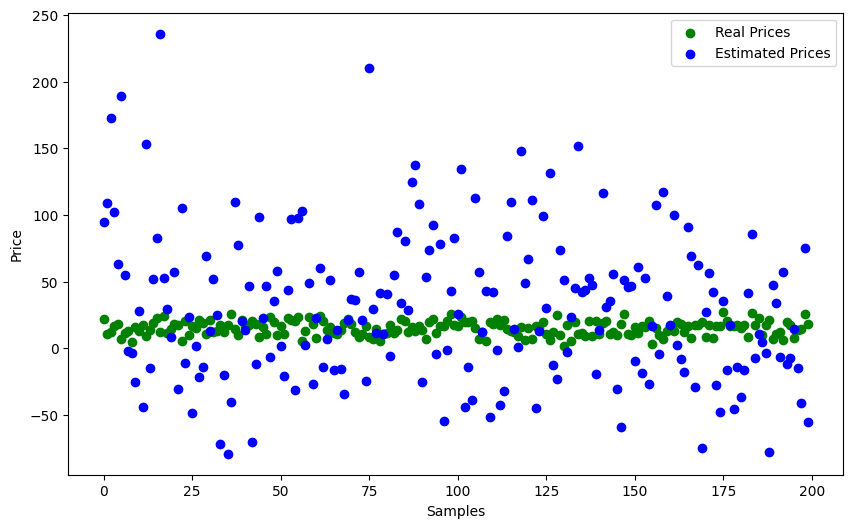

In [43]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()